<a href="https://colab.research.google.com/github/Karan51193/Time_Series_Wallmart_Problem/blob/main/EDA_WallMart_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read data and Import Libraries

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
#Mount the drive

#Change directory
%cd /content/drive/MyDrive/Data_Science_Stuff/ML_AI.lnk/ML_Projects_Common/'Walmart_Sales_Prediction'/Data_Set/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1MQVFWdpp21uf0r5GrQO9rMVSjJLXKynb/ML AI shared repository/ML_Projects_Common/Walmart_Sales_Prediction/Data_Set


In [ ]:
ls

features.csv      sampleSubmission.csv.zip  test.csv      train.csv
features.csv.zip  stores.csv                test.csv.zip  train.csv.zip


In [ ]:
#Import library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import exists

In [ ]:
#Upzip and read .csv files (train set)

if exists("train.csv"):
  df_train=pd.read_csv("train.csv")

else:
  !unzip train.csv.zip
  df_train=pd.read_csv("train.csv")

In [ ]:
#Upzip and read .csv files (test set)


if exists("test.csv"):
  df_test=pd.read_csv("test.csv")

else:
  !unzip test.csv.zip
  df_test=pd.read_csv("test.csv")


In [ ]:
#Upzip and read .csv files (features files)

if exists("features.csv"):
  df_features=pd.read_csv("features.csv")

else:
  !unzip features.csv.zip
  df_features=pd.read_csv("features.csv")

In [ ]:
#Read .csv files (store files)

df_store=pd.read_csv("stores.csv")

In [ ]:
df_train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [ ]:
df_test.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [ ]:
df_features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
df_store.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

#Dataset overall analysis

In [ ]:
train_group=df_train.groupby("Store")

In [ ]:
#List of stores:

print(" List of stores: ",train_group.groups.keys())

 List of stores:  dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])


  Observation from above:

We have store numbers starting from 1 to 45

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Empty DataFrame
Columns: [column_name, missing_count]
Index: []


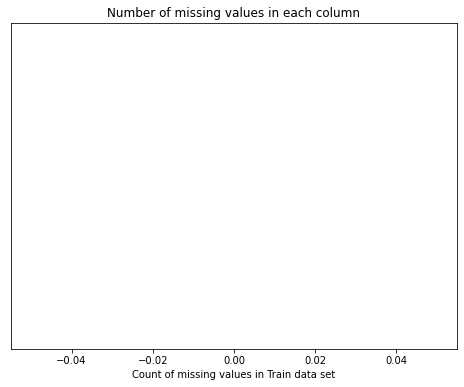

In [ ]:
#Plot missing values for each column
missing_df = df_train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df)

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values in Train data set")
ax.set_title("Number of missing values in each column")
plt.show()

Empty DataFrame
Columns: [column_name, missing_count]
Index: []


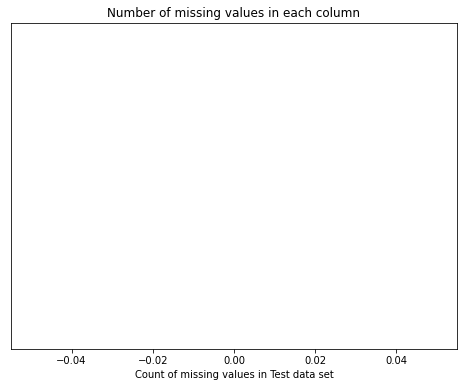

In [ ]:
#Plot missing values for each column
missing_df = df_test.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df)

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values in Test data set")
ax.set_title("Number of missing values in each column")
plt.show()

Observation from above:

There are no missing values in Train set and Test set

     column_name  missing_count
9            CPI            585
10  Unemployment            585
8      MarkDown5           4140
4      MarkDown1           4158
6      MarkDown3           4577
7      MarkDown4           4726
5      MarkDown2           5269


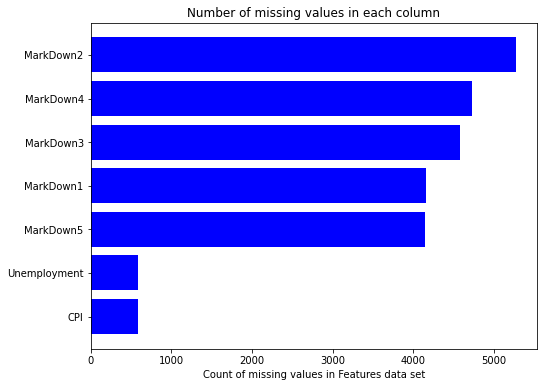

In [ ]:
#Plot missing values for each column
missing_df = df_features.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df)

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values in Features data set")
ax.set_title("Number of missing values in each column")
plt.show()

Empty DataFrame
Columns: [column_name, missing_count]
Index: []


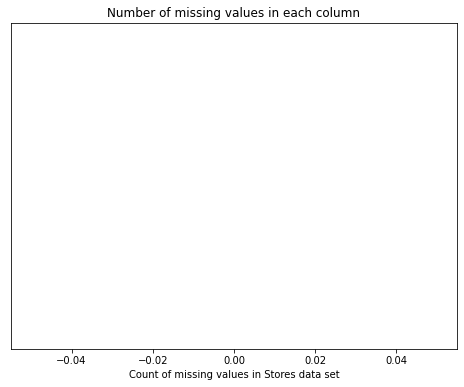

In [ ]:
#Plot missing values for each column
missing_df = df_store.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df)

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values in Stores data set")
ax.set_title("Number of missing values in each column")
plt.show()

Observation from above:

We have missing columns only in Features dataset for Markdowns and CPI and Unemployment.
Missing value can either be made 0, or we can simply drop columns with large number of missing values.
This will be explored in next steps.

#rough work

In [ ]:
train_group_store=df_train.groupby("Store")

In [ ]:
train_group_holiday=df_train.groupby("IsHoliday")

In [ ]:
train_group_holiday.groups.keys()

dict_keys([False, True])

In [ ]:
train_group_holiday.get_group(True)

Store  Dept        Date  Weekly_Sales  IsHoliday
1           1     1  2010-02-12      46039.49       True
31          1     1  2010-09-10      18194.74       True
42          1     1  2010-11-26      18820.29       True
47          1     1  2010-12-31      19124.58       True
53          1     1  2011-02-11      37887.17       True
...       ...   ...         ...           ...        ...
421510     45    98  2011-09-09       1092.66       True
421521     45    98  2011-11-25        794.62       True
421526     45    98  2011-12-30        553.21       True
421532     45    98  2012-02-10        770.86       True
421562     45    98  2012-09-07        352.44       True

[29661 rows x 5 columns]

In [ ]:
print(" List of stores: ",train_group.groups.keys())

In [ ]:
df_train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [ ]:
df_features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
df_store.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

#Cleaning the data

In [ ]:
#Merge train dataframe and store dataframe:--


df_train_store=pd.merge(df_train,df_store,on="Store",how="outer")

df_train_store

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0           1     1  2010-02-05      24924.50      False    A  151315
1           1     1  2010-02-12      46039.49       True    A  151315
2           1     1  2010-02-19      41595.55      False    A  151315
3           1     1  2010-02-26      19403.54      False    A  151315
4           1     1  2010-03-05      21827.90      False    A  151315
...       ...   ...         ...           ...        ...  ...     ...
421565     45    98  2012-09-28        508.37      False    B  118221
421566     45    98  2012-10-05        628.10      False    B  118221
421567     45    98  2012-10-12       1061.02      False    B  118221
421568     45    98  2012-10-19        760.01      False    B  118221
421569     45    98  2012-10-26       1076.80      False    B  118221

[421570 rows x 7 columns]

In [ ]:
df_train_store

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0           1     1  2010-02-05      24924.50      False    A  151315
1           1     1  2010-02-12      46039.49       True    A  151315
2           1     1  2010-02-19      41595.55      False    A  151315
3           1     1  2010-02-26      19403.54      False    A  151315
4           1     1  2010-03-05      21827.90      False    A  151315
...       ...   ...         ...           ...        ...  ...     ...
421565     45    98  2012-09-28        508.37      False    B  118221
421566     45    98  2012-10-05        628.10      False    B  118221
421567     45    98  2012-10-12       1061.02      False    B  118221
421568     45    98  2012-10-19        760.01      False    B  118221
421569     45    98  2012-10-26       1076.80      False    B  118221

[421570 rows x 7 columns]

Empty DataFrame
Columns: [column_name, missing_count]
Index: []


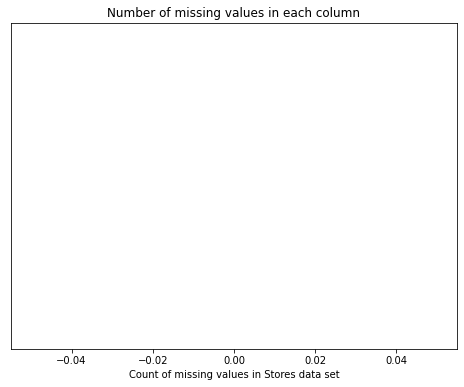

In [ ]:
#Plot missing values for each column
missing_df = df_train_store.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
print(missing_df)

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values in Stores data set")
ax.set_title("Number of missing values in each column")
plt.show()

Observation:

No missing features after merging train and store dataframe, which implies all Stores are accounted for and merge should be successful

In [ ]:
df_features_new=df_features.fillna(0)#Fill NaN as 0

In [ ]:
df_features_new

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572       0.00       0.00   
1         1  2010-02-12        38.51       2.548       0.00       0.00   
2         1  2010-02-19        39.93       2.514       0.00       0.00   
3         1  2010-02-26        46.63       2.561       0.00       0.00   
4         1  2010-03-05        46.50       2.625       0.00       0.00   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0          0.00       0.00       0.00  211.096358         8.106      False  
1          0.00       0.00       0.00  211.242170         8.106       True  
2          0.00       0.00       0.00  211.289143         8.106      False  
3          0.00       0.00       0.00  211.319643         8.106      False  
4          0.00       0.00       0.00  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69    0.000000         0.000      False  
8186     582.74    5797.47    1514.93    0.000000         0.000      False  
8187      85.72     744.84    2150.36    0.000000         0.000      False  
8188     204.19     363.00    1059.46    0.000000         0.000      False  
8189       2.06      10.88    1864.57    0.000000         0.000      False  

[8190 rows x 12 columns]

In [ ]:
#Merge df_features_new and df_train dataframe:--

df_train_fea_store=pd.merge(df_features_new,df_train_store,on=["Store","Date"],how="outer")


In [ ]:
df_train_fea_store

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0           1  2010-02-05        42.31       2.572       0.00       0.00   
1           1  2010-02-05        42.31       2.572       0.00       0.00   
2           1  2010-02-05        42.31       2.572       0.00       0.00   
3           1  2010-02-05        42.31       2.572       0.00       0.00   
4           1  2010-02-05        42.31       2.572       0.00       0.00   
...       ...         ...          ...         ...        ...        ...   
423320     45  2013-06-28        76.05       3.639    4842.29     975.03   
423321     45  2013-07-05        77.50       3.614    9090.48    2268.58   
423322     45  2013-07-12        79.37       3.614    3789.94    1827.31   
423323     45  2013-07-19        82.84       3.737    2961.49    1047.07   
423324     45  2013-07-26        76.06       3.804     212.02     851.73   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0            0.00       0.00       0.00  211.096358         8.106   
1            0.00       0.00       0.00  211.096358         8.106   
2            0.00       0.00       0.00  211.096358         8.106   
3            0.00       0.00       0.00  211.096358         8.106   
4            0.00       0.00       0.00  211.096358         8.106   
...           ...        ...        ...         ...           ...   
423320       3.00    2449.97    3169.69    0.000000         0.000   
423321     582.74    5797.47    1514.93    0.000000         0.000   
423322      85.72     744.84    2150.36    0.000000         0.000   
423323     204.19     363.00    1059.46    0.000000         0.000   
423324       2.06      10.88    1864.57    0.000000         0.000   

        IsHoliday_x  Dept  Weekly_Sales IsHoliday_y Type      Size  
0             False   1.0      24924.50       False    A  151315.0  
1             False   2.0      50605.27       False    A  151315.0  
2             False   3.0      13740.12       False    A  151315.0  
3             False   4.0      39954.04       False    A  151315.0  
4             False   5.0      32229.38       False    A  151315.0  
...             ...   ...           ...         ...  ...       ...  
423320        False   NaN           NaN         NaN  NaN       NaN  
423321        False   NaN           NaN         NaN  NaN       NaN  
423322        False   NaN           NaN         NaN  NaN       NaN  
423323        False   NaN           NaN         NaN  NaN       NaN  
423324        False   NaN           NaN         NaN  NaN       NaN  

[423325 rows x 17 columns]

Observation:
In able DF we can observe that after outer join we get many NaN values, these are replaced with -1 for further processing

In [ ]:
df_train_fea_store_1=df_train_fea_store.fillna(-1)

In [ ]:
df_train_fea_store_1

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0           1  2010-02-05        42.31       2.572       0.00       0.00   
1           1  2010-02-05        42.31       2.572       0.00       0.00   
2           1  2010-02-05        42.31       2.572       0.00       0.00   
3           1  2010-02-05        42.31       2.572       0.00       0.00   
4           1  2010-02-05        42.31       2.572       0.00       0.00   
...       ...         ...          ...         ...        ...        ...   
423320     45  2013-06-28        76.05       3.639    4842.29     975.03   
423321     45  2013-07-05        77.50       3.614    9090.48    2268.58   
423322     45  2013-07-12        79.37       3.614    3789.94    1827.31   
423323     45  2013-07-19        82.84       3.737    2961.49    1047.07   
423324     45  2013-07-26        76.06       3.804     212.02     851.73   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0            0.00       0.00       0.00  211.096358         8.106   
1            0.00       0.00       0.00  211.096358         8.106   
2            0.00       0.00       0.00  211.096358         8.106   
3            0.00       0.00       0.00  211.096358         8.106   
4            0.00       0.00       0.00  211.096358         8.106   
...           ...        ...        ...         ...           ...   
423320       3.00    2449.97    3169.69    0.000000         0.000   
423321     582.74    5797.47    1514.93    0.000000         0.000   
423322      85.72     744.84    2150.36    0.000000         0.000   
423323     204.19     363.00    1059.46    0.000000         0.000   
423324       2.06      10.88    1864.57    0.000000         0.000   

        IsHoliday_x  Dept  Weekly_Sales IsHoliday_y Type      Size  
0             False   1.0      24924.50       False    A  151315.0  
1             False   2.0      50605.27       False    A  151315.0  
2             False   3.0      13740.12       False    A  151315.0  
3             False   4.0      39954.04       False    A  151315.0  
4             False   5.0      32229.38       False    A  151315.0  
...             ...   ...           ...         ...  ...       ...  
423320        False  -1.0         -1.00          -1   -1      -1.0  
423321        False  -1.0         -1.00          -1   -1      -1.0  
423322        False  -1.0         -1.00          -1   -1      -1.0  
423323        False  -1.0         -1.00          -1   -1      -1.0  
423324        False  -1.0         -1.00          -1   -1      -1.0  

[423325 rows x 17 columns]

Observations:
Large number of ["Store", "Date"] pairs seem to have no Weekly_Sales or NaN.
These need to be dropped

In [ ]:
df_train_fea_store_1[df_train_fea_store_1.Weekly_Sales==-1]

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
10244       1  2012-11-02        55.32       3.386    6766.44    5147.70   
10245       1  2012-11-09        61.24       3.314   11421.32    3370.89   
10246       1  2012-11-16        52.92       3.252    9696.28     292.10   
10247       1  2012-11-23        56.23       3.211     883.59       4.17   
10248       1  2012-11-30        52.34       3.207    2460.03       0.00   
...       ...         ...          ...         ...        ...        ...   
423320     45  2013-06-28        76.05       3.639    4842.29     975.03   
423321     45  2013-07-05        77.50       3.614    9090.48    2268.58   
423322     45  2013-07-12        79.37       3.614    3789.94    1827.31   
423323     45  2013-07-19        82.84       3.737    2961.49    1047.07   
423324     45  2013-07-26        76.06       3.804     212.02     851.73   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
10244       50.82    3639.90    2737.42  223.462779         6.573   
10245       40.28    4646.79    6154.16  223.481307         6.573   
10246      103.78    1133.15    6612.69  223.512911         6.573   
10247    74910.32     209.91     303.32  223.561947         6.573   
10248     3838.35     150.57    6966.34  223.610984         6.573   
...           ...        ...        ...         ...           ...   
423320       3.00    2449.97    3169.69    0.000000         0.000   
423321     582.74    5797.47    1514.93    0.000000         0.000   
423322      85.72     744.84    2150.36    0.000000         0.000   
423323     204.19     363.00    1059.46    0.000000         0.000   
423324       2.06      10.88    1864.57    0.000000         0.000   

        IsHoliday_x  Dept  Weekly_Sales IsHoliday_y Type  Size  
10244         False  -1.0          -1.0          -1   -1  -1.0  
10245         False  -1.0          -1.0          -1   -1  -1.0  
10246         False  -1.0          -1.0          -1   -1  -1.0  
10247          True  -1.0          -1.0          -1   -1  -1.0  
10248         False  -1.0          -1.0          -1   -1  -1.0  
...             ...   ...           ...         ...  ...   ...  
423320        False  -1.0          -1.0          -1   -1  -1.0  
423321        False  -1.0          -1.0          -1   -1  -1.0  
423322        False  -1.0          -1.0          -1   -1  -1.0  
423323        False  -1.0          -1.0          -1   -1  -1.0  
423324        False  -1.0          -1.0          -1   -1  -1.0  

[1766 rows x 17 columns]

In [ ]:
df_train_fea_store_1.Weekly_Sales.value_counts()

-1.00       1766
 10.00       353
 5.00        289
 20.00       232
 15.00       215
            ... 
 3268.34       1
 3520.24       1
 5072.07       1
 501.51        1
 1076.80       1
Name: Weekly_Sales, Length: 359464, dtype: int64

In [ ]:
df_train_fea_store_2=df_train_fea_store_1.drop(df_train_fea_store_1.index[df_train_fea_store_1['Weekly_Sales'] == -1])

In [ ]:
df_train_fea_store_2

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0           1  2010-02-05        42.31       2.572       0.00       0.00   
1           1  2010-02-05        42.31       2.572       0.00       0.00   
2           1  2010-02-05        42.31       2.572       0.00       0.00   
3           1  2010-02-05        42.31       2.572       0.00       0.00   
4           1  2010-02-05        42.31       2.572       0.00       0.00   
...       ...         ...          ...         ...        ...        ...   
423281     45  2012-10-26        58.85       3.882    4018.91      58.08   
423282     45  2012-10-26        58.85       3.882    4018.91      58.08   
423283     45  2012-10-26        58.85       3.882    4018.91      58.08   
423284     45  2012-10-26        58.85       3.882    4018.91      58.08   
423285     45  2012-10-26        58.85       3.882    4018.91      58.08   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0             0.0       0.00       0.00  211.096358         8.106   
1             0.0       0.00       0.00  211.096358         8.106   
2             0.0       0.00       0.00  211.096358         8.106   
3             0.0       0.00       0.00  211.096358         8.106   
4             0.0       0.00       0.00  211.096358         8.106   
...           ...        ...        ...         ...           ...   
423281      100.0     211.94     858.33  192.308899         8.667   
423282      100.0     211.94     858.33  192.308899         8.667   
423283      100.0     211.94     858.33  192.308899         8.667   
423284      100.0     211.94     858.33  192.308899         8.667   
423285      100.0     211.94     858.33  192.308899         8.667   

        IsHoliday_x  Dept  Weekly_Sales IsHoliday_y Type      Size  
0             False   1.0      24924.50       False    A  151315.0  
1             False   2.0      50605.27       False    A  151315.0  
2             False   3.0      13740.12       False    A  151315.0  
3             False   4.0      39954.04       False    A  151315.0  
4             False   5.0      32229.38       False    A  151315.0  
...             ...   ...           ...         ...  ...       ...  
423281        False  93.0       2487.80       False    B  118221.0  
423282        False  94.0       5203.31       False    B  118221.0  
423283        False  95.0      56017.47       False    B  118221.0  
423284        False  97.0       6817.48       False    B  118221.0  
423285        False  98.0       1076.80       False    B  118221.0  

[421559 rows x 17 columns]

In [ ]:
df_train_fea_store_2.Weekly_Sales.value_counts()

10.00      353
5.00       289
20.00      232
15.00      215
12.00      175
          ... 
3268.34      1
3520.24      1
5072.07      1
501.51       1
1076.80      1
Name: Weekly_Sales, Length: 359463, dtype: int64

In [ ]:
df_train_fea_store_2.IsHoliday_x.value_counts()

False    391900
True      29659
Name: IsHoliday_x, dtype: int64

In [ ]:
df_train_fea_store_2.IsHoliday_y.value_counts()

False    391900
True      29659
Name: IsHoliday_y, dtype: int64

Observation:
Since IsHoliday_x and IsHoliday_y are duplicates, we drop one amongst them and rename the other as IsHoliday

In [ ]:
df_train_fea_store_3=df_train_fea_store_2.drop("IsHoliday_y",axis=1)

In [ ]:
df_train_fea_store_3.rename(columns={"IsHoliday_x":"IsHoliday"},inplace = True)

In [ ]:
df_train_fea_store_3.IsHoliday.value_counts()

False    391900
True      29659
Name: IsHoliday, dtype: int64

In [ ]:
df_train_fea_store_3

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0           1  2010-02-05        42.31       2.572       0.00       0.00   
1           1  2010-02-05        42.31       2.572       0.00       0.00   
2           1  2010-02-05        42.31       2.572       0.00       0.00   
3           1  2010-02-05        42.31       2.572       0.00       0.00   
4           1  2010-02-05        42.31       2.572       0.00       0.00   
...       ...         ...          ...         ...        ...        ...   
423281     45  2012-10-26        58.85       3.882    4018.91      58.08   
423282     45  2012-10-26        58.85       3.882    4018.91      58.08   
423283     45  2012-10-26        58.85       3.882    4018.91      58.08   
423284     45  2012-10-26        58.85       3.882    4018.91      58.08   
423285     45  2012-10-26        58.85       3.882    4018.91      58.08   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0             0.0       0.00       0.00  211.096358         8.106      False   
1             0.0       0.00       0.00  211.096358         8.106      False   
2             0.0       0.00       0.00  211.096358         8.106      False   
3             0.0       0.00       0.00  211.096358         8.106      False   
4             0.0       0.00       0.00  211.096358         8.106      False   
...           ...        ...        ...         ...           ...        ...   
423281      100.0     211.94     858.33  192.308899         8.667      False   
423282      100.0     211.94     858.33  192.308899         8.667      False   
423283      100.0     211.94     858.33  192.308899         8.667      False   
423284      100.0     211.94     858.33  192.308899         8.667      False   
423285      100.0     211.94     858.33  192.308899         8.667      False   

        Dept  Weekly_Sales Type      Size  
0        1.0      24924.50    A  151315.0  
1        2.0      50605.27    A  151315.0  
2        3.0      13740.12    A  151315.0  
3        4.0      39954.04    A  151315.0  
4        5.0      32229.38    A  151315.0  
...      ...           ...  ...       ...  
423281  93.0       2487.80    B  118221.0  
423282  94.0       5203.31    B  118221.0  
423283  95.0      56017.47    B  118221.0  
423284  97.0       6817.48    B  118221.0  
423285  98.0       1076.80    B  118221.0  

[421559 rows x 16 columns]

Observation:
Above is the final data frame we decide to work with

#Feature Analysis

In [ ]:
df_train_fea_store_3.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Type', 'Size'],
      dtype='object')

In [ ]:
numerical_fea=['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Dept','Weekly_Sales', 'Size']

In [ ]:
categorical=["IsHoliday","Type"]

In [ ]:
time=["Date"]

In [ ]:
#Plot bi-variate plots for numerical features

df_no_date=df_train_fea_store_3[numerical_fea+categorical]

In [ ]:
df_no_date

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0           1        42.31       2.572       0.00       0.00        0.0   
1           1        42.31       2.572       0.00       0.00        0.0   
2           1        42.31       2.572       0.00       0.00        0.0   
3           1        42.31       2.572       0.00       0.00        0.0   
4           1        42.31       2.572       0.00       0.00        0.0   
...       ...          ...         ...        ...        ...        ...   
423281     45        58.85       3.882    4018.91      58.08      100.0   
423282     45        58.85       3.882    4018.91      58.08      100.0   
423283     45        58.85       3.882    4018.91      58.08      100.0   
423284     45        58.85       3.882    4018.91      58.08      100.0   
423285     45        58.85       3.882    4018.91      58.08      100.0   

        MarkDown4  MarkDown5         CPI  Unemployment  Dept  Weekly_Sales  \
0            0.00       0.00  211.096358         8.106   1.0      24924.50   
1            0.00       0.00  211.096358         8.106   2.0      50605.27   
2            0.00       0.00  211.096358         8.106   3.0      13740.12   
3            0.00       0.00  211.096358         8.106   4.0      39954.04   
4            0.00       0.00  211.096358         8.106   5.0      32229.38   
...           ...        ...         ...           ...   ...           ...   
423281     211.94     858.33  192.308899         8.667  93.0       2487.80   
423282     211.94     858.33  192.308899         8.667  94.0       5203.31   
423283     211.94     858.33  192.308899         8.667  95.0      56017.47   
423284     211.94     858.33  192.308899         8.667  97.0       6817.48   
423285     211.94     858.33  192.308899         8.667  98.0       1076.80   

            Size  IsHoliday Type  
0       151315.0      False    A  
1       151315.0      False    A  
2       151315.0      False    A  
3       151315.0      False    A  
4       151315.0      False    A  
...          ...        ...  ...  
423281  118221.0      False    B  
423282  118221.0      False    B  
423283  118221.0      False    B  
423284  118221.0      False    B  
423285  118221.0      False    B  

[421559 rows x 15 columns]

In [ ]:
df_no_date_sample=df_no_date.sample(frac=0.3)

KeyboardInterrupt: ignored

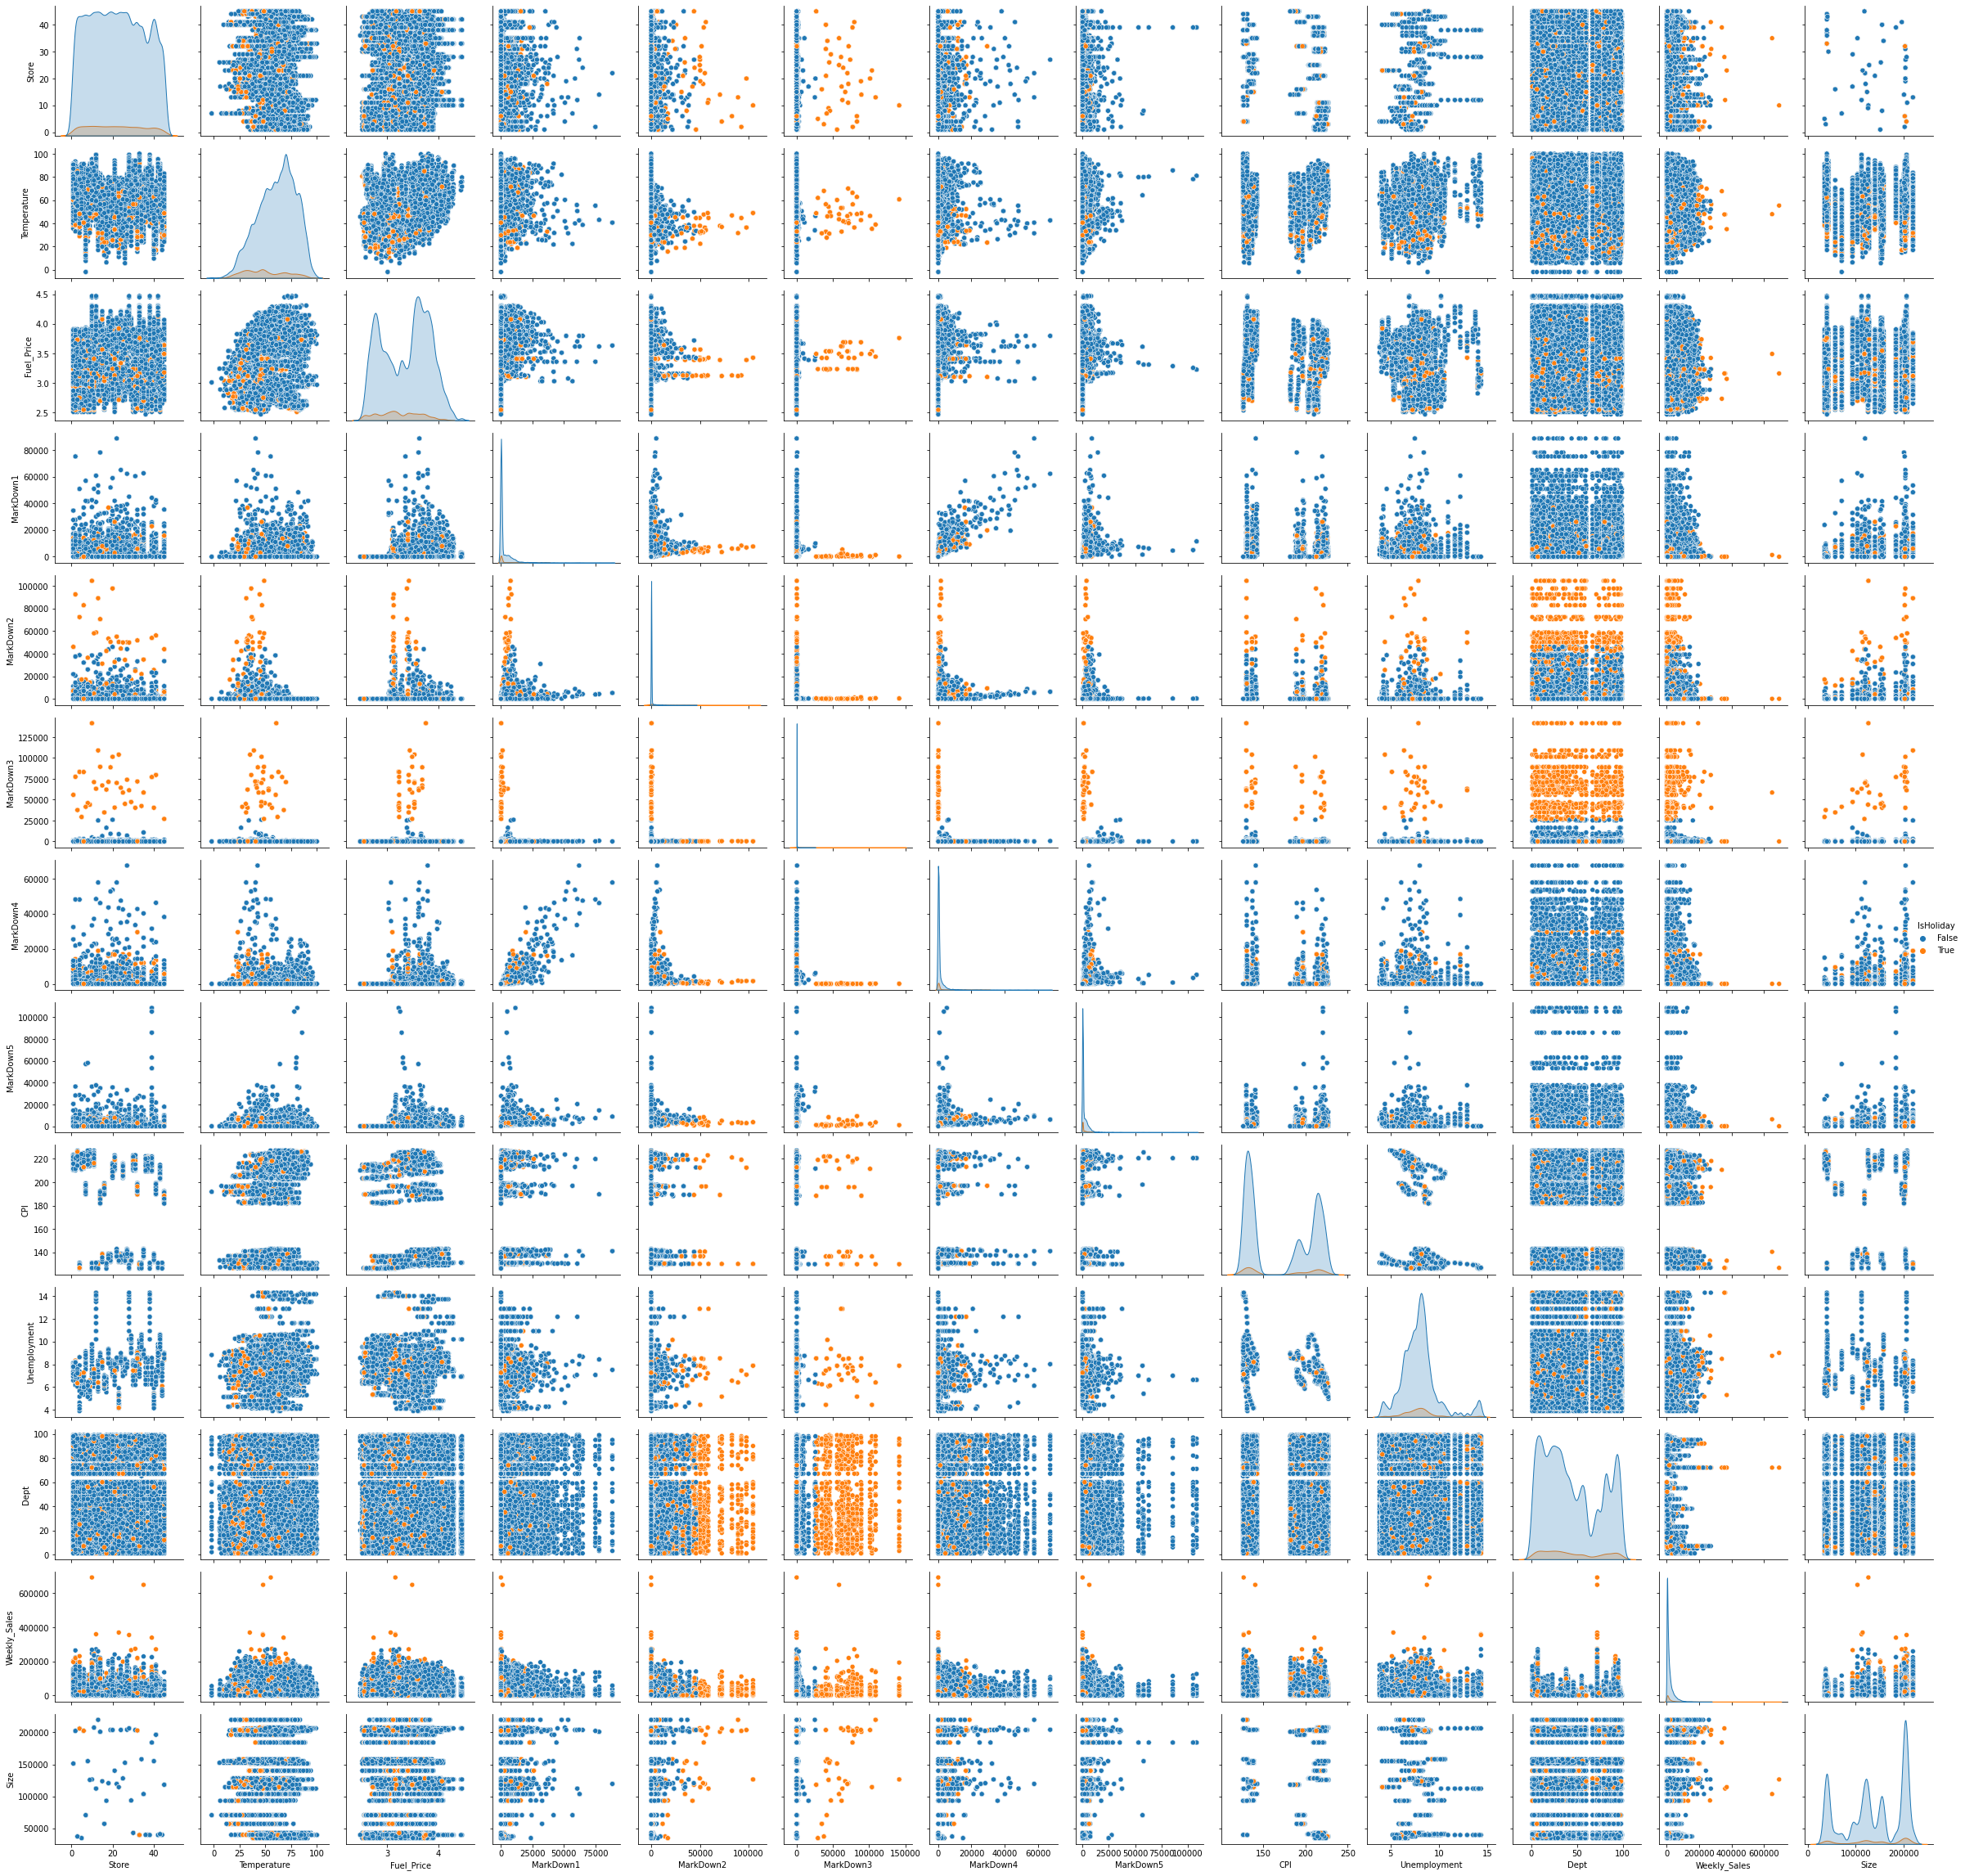

In [ ]:
sns.pairplot(df_no_date_sample,hue="IsHoliday")